In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report ,accuracy_score
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
df=pd.read_csv(r'C:\Users\abdal\Downloads\breast cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.shape

(569, 33)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(569, 33)

In [8]:
df.drop("Unnamed: 32",axis=1,inplace=True)

In [9]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [10]:
count_diagnosis=df['diagnosis'].value_counts()

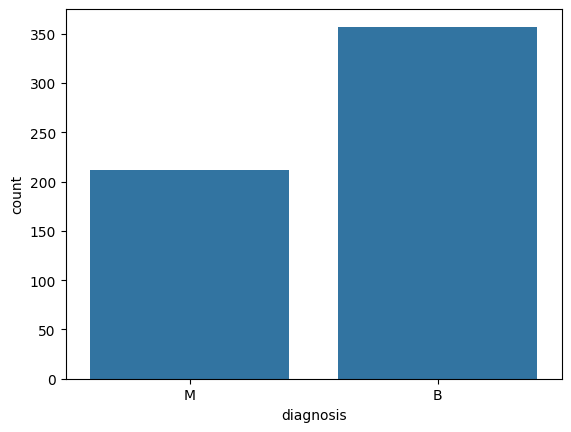

In [11]:
plt.Figure(figsize=(12,12))
sns.countplot(x=df["diagnosis"])
plt.show()

In [12]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
df['diagnosis']=df['diagnosis'].map({'M':1,"B":0})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
df.corr()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [16]:
x=df.drop(df[['id','diagnosis']],axis=1)
y=df['diagnosis']

In [17]:
x.shape

(569, 30)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,shuffle=True,stratify=y,random_state=42)

In [19]:
mlflow.sklearn.autolog()
mlflow.set_experiment("Breast Cancer")

with mlflow.start_run():
    model = LogisticRegression(max_iter=500)
    model.fit(x_train, y_train)

    pred = model.predict(x_test)
    

    acc = accuracy_score(y_test, pred)
    print(classification_report(y_test, pred))

    mlflow.log_metric("accuracy_manual", acc)

2026/02/04 05:01:58 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.schemas
2026/02/04 05:01:58 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.tables
2026/02/04 05:01:58 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.types
2026/02/04 05:01:58 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.constraints
2026/02/04 05:01:58 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.defaults
2026/02/04 05:01:58 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.comments
2026/02/04 05:01:58 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/02/04 05:01:59 INFO mlflow.store.db.utils: Updating database tables
2026/02/04 05:01:59 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/02/04 05:01:59 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/02/04 05:01:59 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2026/02/04 05:0

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [25]:
df.head(3).values

array([[8.4230200e+05, 1.0000000e+00, 1.7990000e+01, 1.0380000e+01,
        1.2280000e+02, 1.0010000e+03, 1.1840000e-01, 2.7760000e-01,
        3.0010000e-01, 1.4710000e-01, 2.4190000e-01, 7.8710000e-02,
        1.0950000e+00, 9.0530000e-01, 8.5890000e+00, 1.5340000e+02,
        6.3990000e-03, 4.9040000e-02, 5.3730000e-02, 1.5870000e-02,
        3.0030000e-02, 6.1930000e-03, 2.5380000e+01, 1.7330000e+01,
        1.8460000e+02, 2.0190000e+03, 1.6220000e-01, 6.6560000e-01,
        7.1190000e-01, 2.6540000e-01, 4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05, 1.0000000e+00, 2.0570000e+01, 1.7770000e+01,
        1.3290000e+02, 1.3260000e+03, 8.4740000e-02, 7.8640000e-02,
        8.6900000e-02, 7.0170000e-02, 1.8120000e-01, 5.6670000e-02,
        5.4350000e-01, 7.3390000e-01, 3.3980000e+00, 7.4080000e+01,
        5.2250000e-03, 1.3080000e-02, 1.8600000e-02, 1.3400000e-02,
        1.3890000e-02, 3.5320000e-03, 2.4990000e+01, 2.3410000e+01,
        1.5880000e+02, 1.9560000e+03, 1.2380000

In [31]:
def predict(array):
    
    if array.ndim == 1:
        array = array.reshape(1, -1)
    
    pred = model.predict(array)
    
    if pred[0] == 1:
        print("M")
    else:
        print("B")
predict(np.array([1.7990000e+01, 1.0380000e+01,
        1.2280000e+02, 1.0010000e+03, 1.1840000e-01, 2.7760000e-01,
        3.0010000e-01, 1.4710000e-01, 2.4190000e-01, 7.8710000e-02,
        1.0950000e+00, 9.0530000e-01, 8.5890000e+00, 1.5340000e+02,
        6.3990000e-03, 4.9040000e-02, 5.3730000e-02, 1.5870000e-02,
        3.0030000e-02, 6.1930000e-03, 2.5380000e+01, 1.7330000e+01,
        1.8460000e+02, 2.0190000e+03, 1.6220000e-01, 6.6560000e-01,
        7.1190000e-01, 2.6540000e-01, 4.6010000e-01, 1.1890000e-01]))

M


c:\Users\abdal\OneDrive\Desktop\nti\nti\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [33]:
with open(r"C:\Users\abdal\OneDrive\Desktop\nti\model\log.pkl",'wb') as file:
    pickle.dump(model,file)